In [547]:
import numpy as np
import math
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn import metrics
import matplotlib.pyplot as plt
from dpca import DensityPeakCluster
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [548]:
file = "aggregation"

In [549]:
#Doc file data
data = pd.read_csv(r"data/data/%s.txt" % file, sep="\t", header=None)
data_arr = np.array(data)

In [550]:
data

0      1  2
0    15.55  28.65  2
1    14.90  27.55  2
2    14.45  28.35  2
3    14.15  28.80  2
4    13.75  28.05  2
..     ...    ... ..
783   7.80   3.35  5
784   8.05   2.75  5
785   8.50   3.25  5
786   8.10   3.55  5
787   8.15   4.00  5

[788 rows x 3 columns]

In [551]:
len(set(data[2]))

7

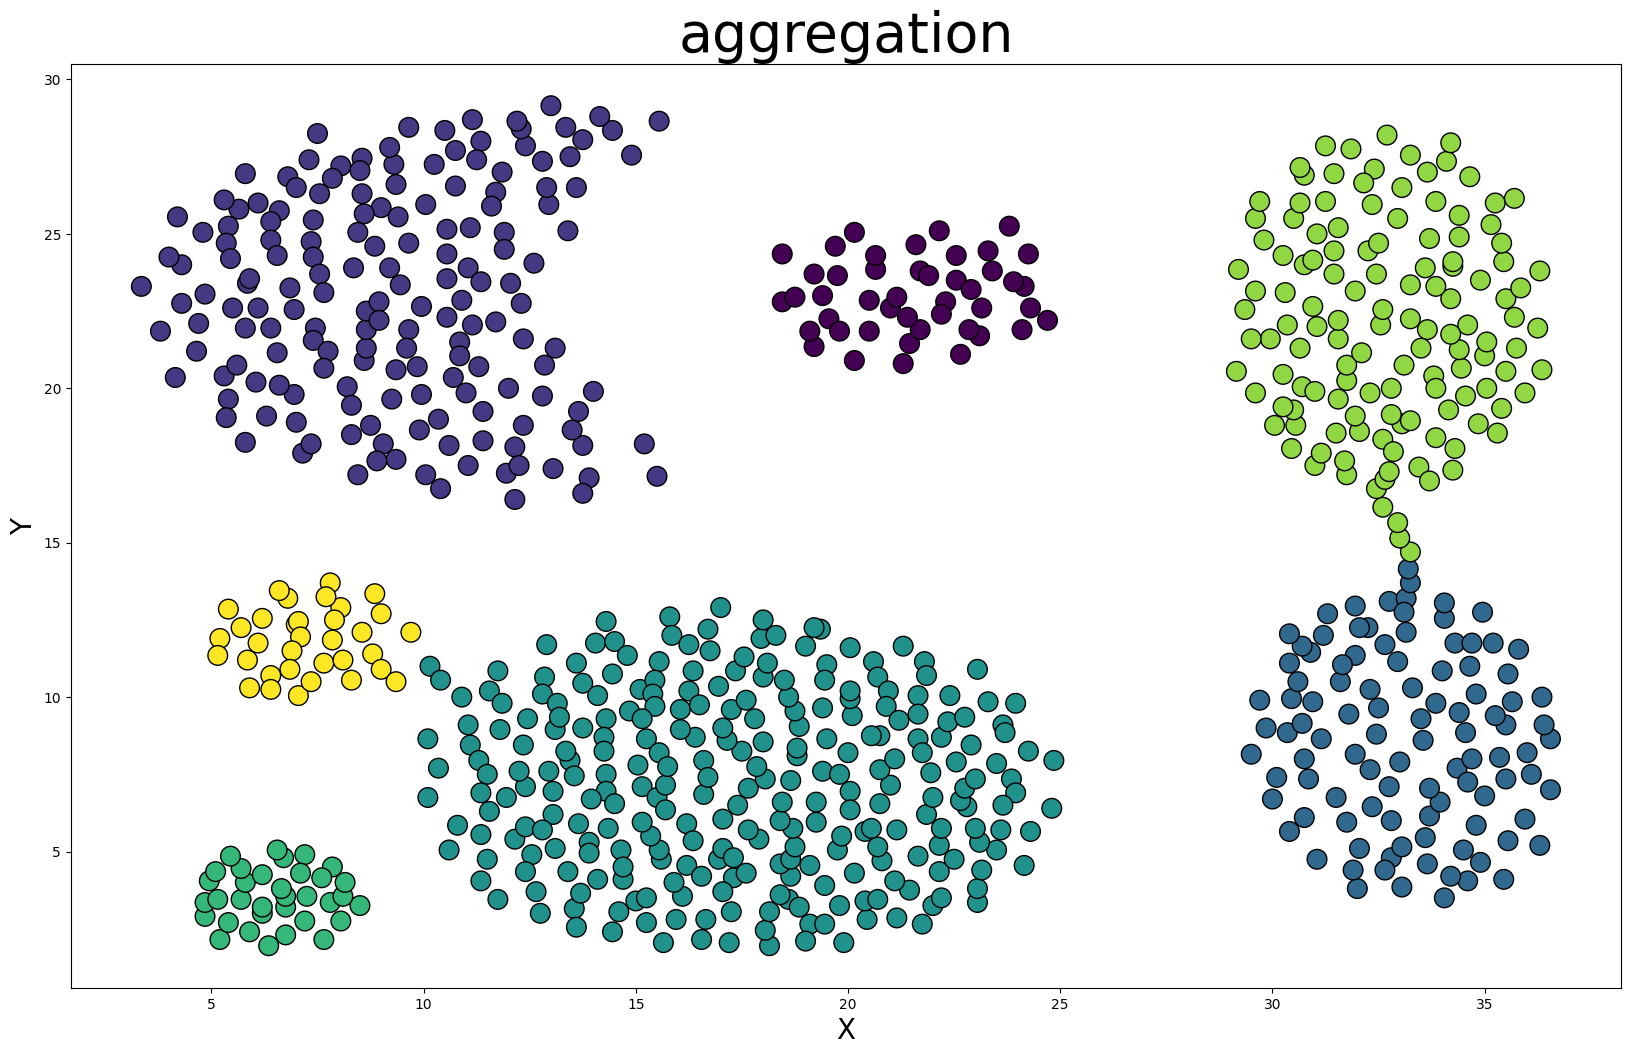

In [552]:
plt.figure(figsize=(20,12))
plt.scatter(
    data_arr[:, 0], data_arr[:, 1],
    c=data.iloc[:,2], marker='o',
    edgecolor='black', s=200
)
plt.xlabel("X", fontsize=20)
plt.ylabel("Y", fontsize=20)
plt.title(file, fontsize=40)
plt.show()

### Kmeans

In [553]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
y_pred = kmeans.fit_predict(data.iloc[:,[0, 1]])
centers=kmeans.cluster_centers_


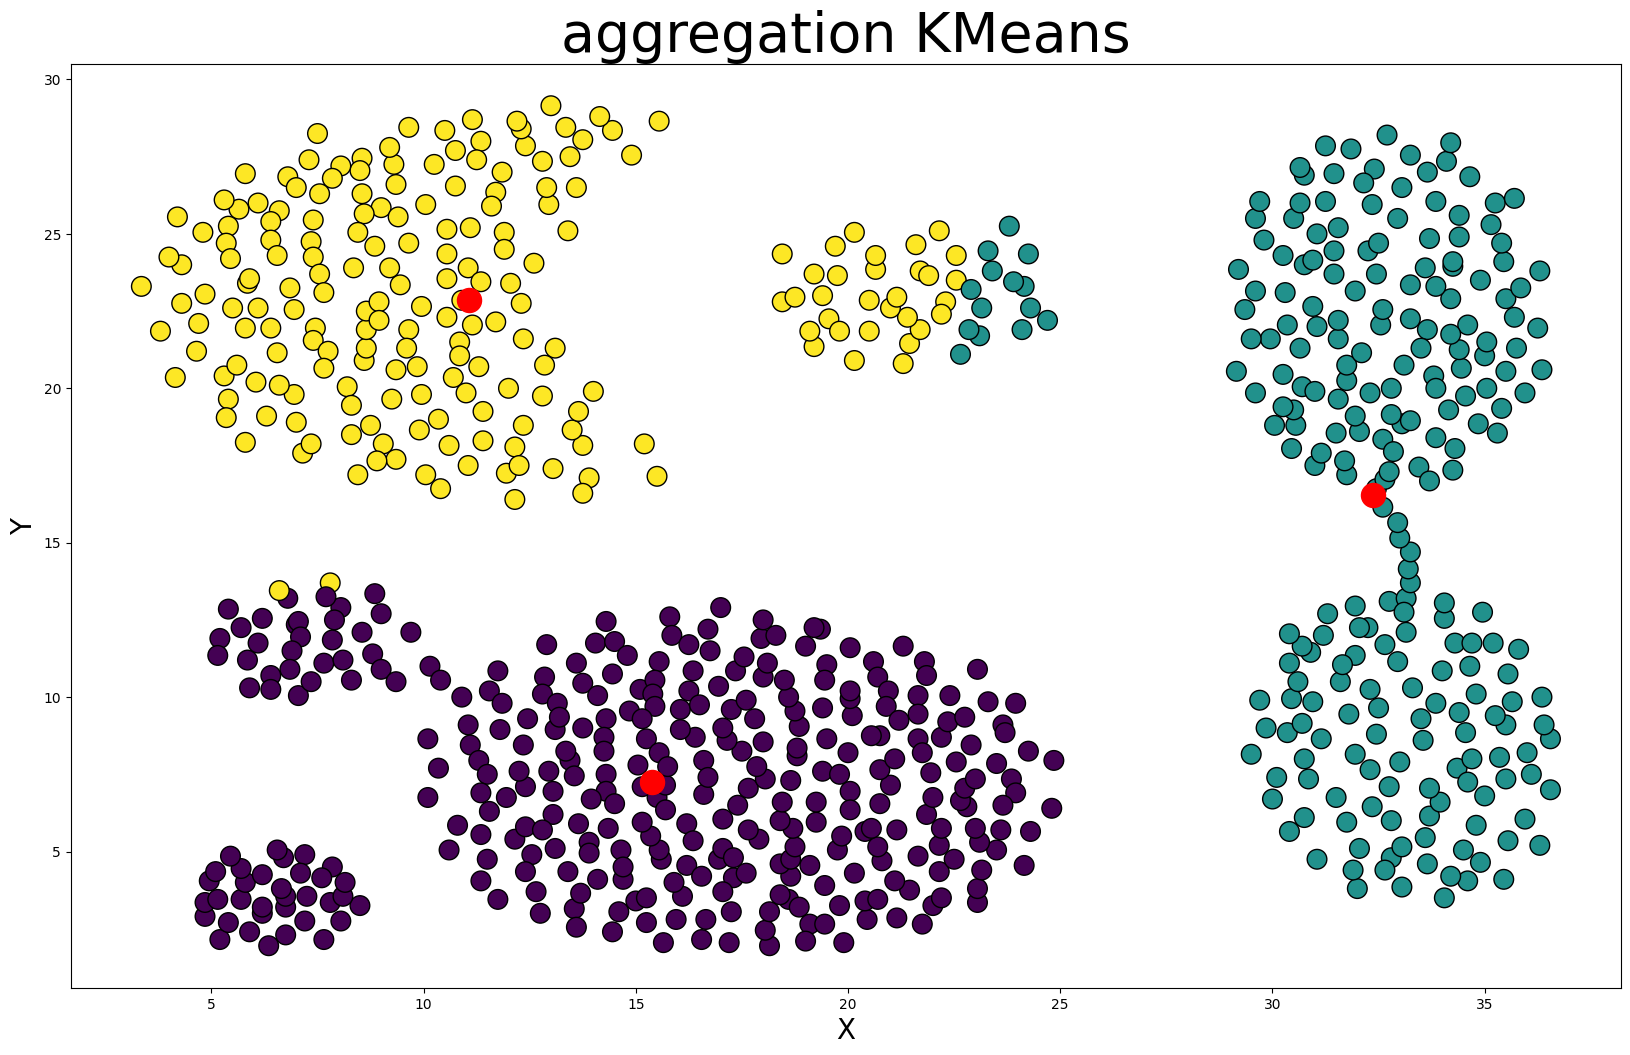

In [554]:
# Show kết quả phân cụm
plt.figure(figsize=(20,12))
plt.scatter(
    data_arr[:, 0], data_arr[:, 1],
    c=y_pred, marker='o',
    edgecolor='black', s=200
)
plt.xlabel("X", fontsize=20)
plt.ylabel("Y", fontsize=20)
plt.scatter(centers[:, 0], centers[:, 1], c='red',s=300)
plt.title(file + " KMeans", fontsize=40)
plt.show()

#### ELBOW

Distorsion: Trung bình cộng bình phương khoảng cách giữa tâm cụm đến các điểm còn lại.

Một mô hình tốt là mô hình có giá trị distorsion thấp và số lượng cụm phù hợp. Tuy nhiên, khi số lượng cụm quá lớn, giá trị distorsion có thể không giảm nhiều nữa hoặc thậm chí tăng lên do sự phân tán của các điểm dữ liệu trong mỗi cụm. Do đó, để tìm một mô hình tốt, chúng ta cần tìm một sự cân bằng giữa giá trị distorsion và số lượng cụm phù hợp cho bộ dữ liệu. 

Chọn số cụm hợp lý bằng cách: chọn điểm mà độ giảm distorsion bắt đầu chậm lại.

In [555]:
distorsions = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data.iloc[:,[0, 1]])
    distorsions.append(kmeans.inertia_)

In [556]:
plt.figure(figsize=(20,12))
plt.plot(range(1,10),distorsions,'bx-')
plt.xlabel("K")
plt.ylabel("Distorsion")
plt.title("Elbow")
plt.show()

#### Silhouette coefficient

Silhouette_score =  (b-a)/max(a,b)

a: trung bình khoảng cách từ điểm hiện tại đến tất cả các điểm còn lại trong cluster

b: trung bình khoảng cách từ điểm hiện tại đến tất cả các điểm ở trong cluster gần nhất

0.5243187019154254


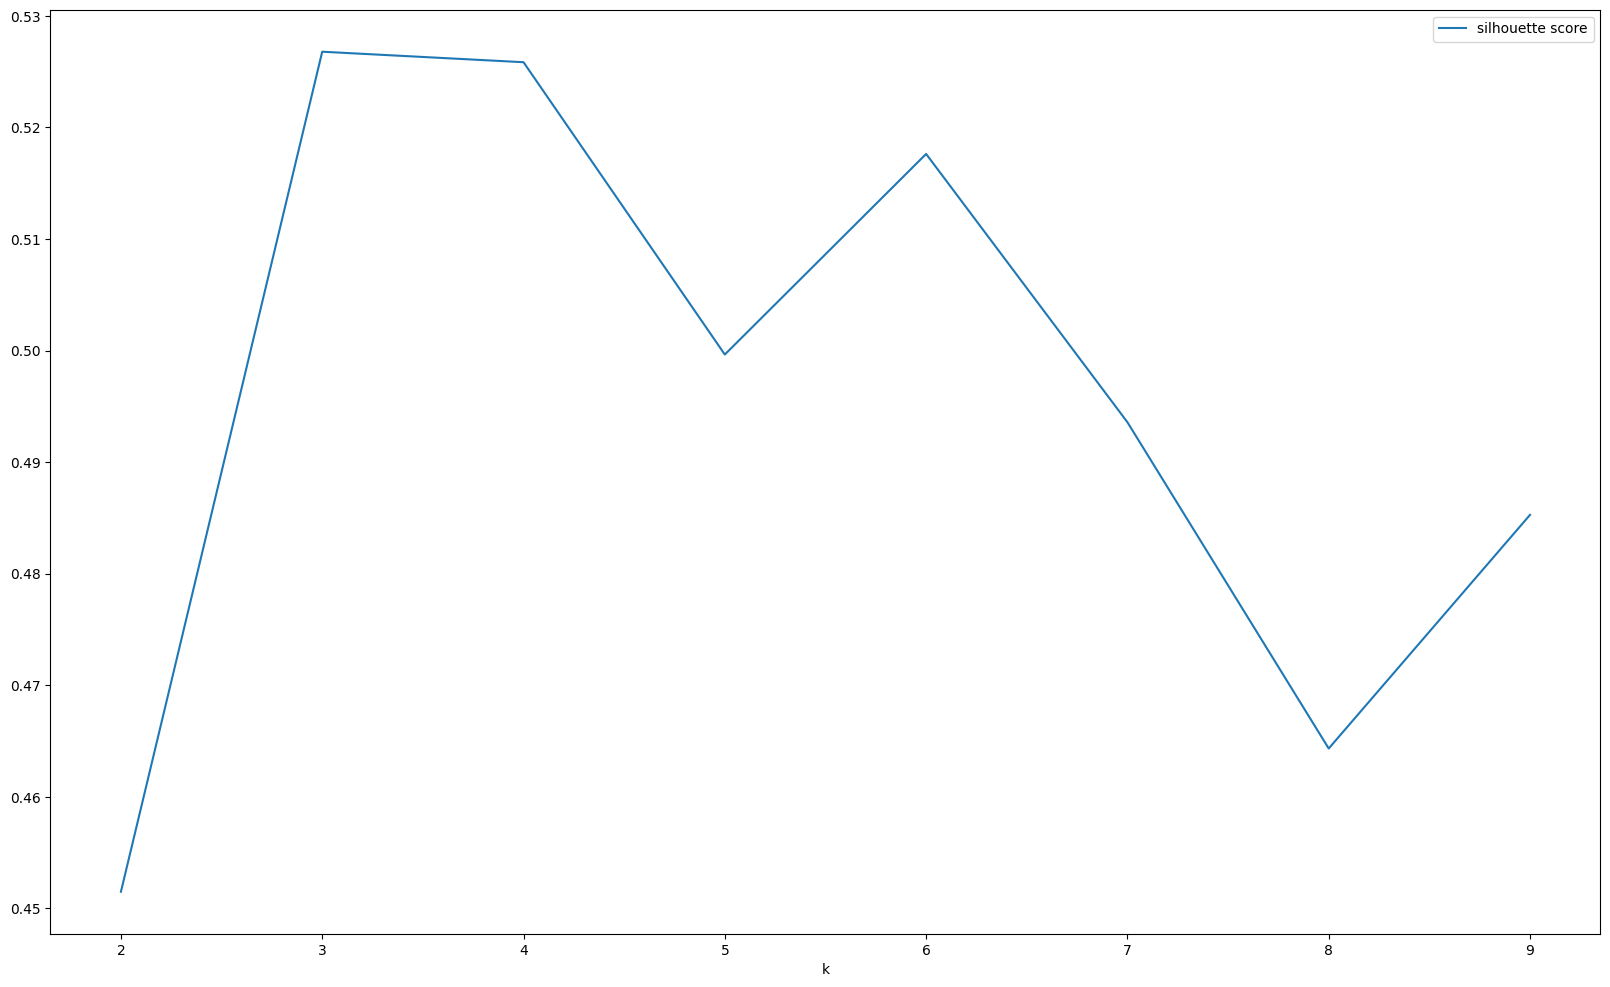

In [557]:
print(metrics.silhouette_score(data,y_pred))
from sklearn.metrics.cluster import silhouette_score
k_values = []
silhouette_score_values = []

for i in range(2,10):
  kmeans = KMeans(n_clusters = i)
  y_pred = kmeans.fit_predict(data)
  k_values.append(i)
  silhouette_score_values.append(metrics.silhouette_score(data, y_pred))
result = pd.DataFrame({'k': k_values, 'silhouette score': silhouette_score_values})
result.plot.line(x='k', y = 'silhouette score', figsize=(20,12))
plt.show()

#### DBSCAN

eps : Nó xác định vùng lân cận xung quanh một điểm dữ liệu, tức là nếu khoảng cách giữa hai điểm nhỏ hơn hoặc bằng 'eps' thì chúng được coi là hàng xóm. Nếu giá trị eps được chọn quá nhỏ thì phần lớn dữ liệu sẽ được coi là ngoại lệ. Nếu nó được chọn rất lớn thì các cụm sẽ hợp nhất và phần lớn các điểm dữ liệu sẽ nằm trong cùng một cụm. Một cách để tìm giá trị eps dựa trên k-distance graph.

MinPts : Số lân cận tối thiểu (điểm dữ liệu) trong bán kính eps. Tập dữ liệu càng lớn thì phải chọn giá trị MinPts càng lớn. Giá trị tối thiểu của MinPts phải được chọn ít nhất là 3.
min_samples : laf MinPts nhưng tính điểm ở tâm 

In [558]:
def calculate_kn_distance(X,k):

    kn_distance = []
    for i in range(len(X)):
        eucl_dist = []
        for j in range(len(X)):
            eucl_dist.append(
                math.sqrt(
                    ((X[i,0] - X[j,0]) ** 2) +
                    ((X[i,1] - X[j,1]) ** 2)))
            
        eucl_dist.sort()
        kn_distance.append(eucl_dist[k])

    return kn_distance
eps_dist = calculate_kn_distance(data_arr, 5)

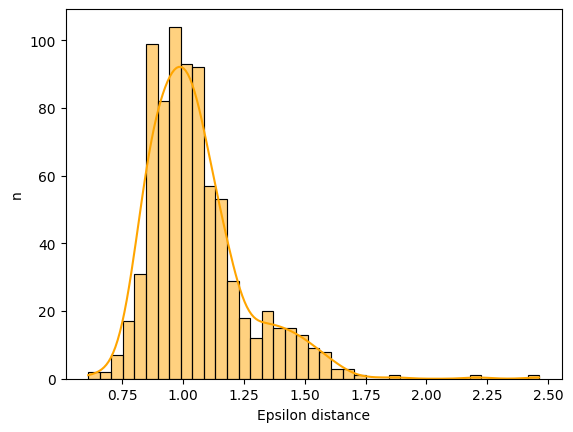

In [559]:

data_df = pd.DataFrame({'': eps_dist})

sns.histplot(x='', data=data_df, kde=True, color='orange')

plt.ylabel('n')
plt.xlabel('Epsilon distance')

plt.show()

In [560]:
import ipywidgets as widgets
display(widgets.HTML(f'<img src="examples/9D6aAF2.gif">'))

HTML(value='<img src="examples/9D6aAF2.gif">')

In [561]:
db = DBSCAN(eps=1.25, min_samples=5).fit(data)
y_pred_DB = db.fit_predict(data)


In [562]:
plt.figure(figsize=(20,12))
plt.scatter(
    data_arr[:, 0], data_arr[:, 1],
    c=y_pred_DB, marker='o',
    edgecolor='black', s=200
)
plt.xlabel("X",fontsize=20)
plt.ylabel("Y",fontsize=20)
plt.title(file + " DBSCAN", fontsize=40)
plt.show()

Density peak clustering (DPC)

https://github.com/colinwke/dpca

#### Tính ma trận khoảng cách:
Đầu tiên, tính toán ma trận khoảng cách giữa tất cả các điểm dữ liệu trong tập dữ liệu. Điều này có thể thực hiện bằng cách sử dụng các phương pháp tính toán khoảng cách như khoảng cách Euclidean, khoảng cách Manhattan, hay khoảng cách Mahalanobis, tùy vào loại dữ liệu bạn đang làm việc.

#### Tính mật độ (ρ) và độ phân cách (σ) của mỗi nút:

Mật độ (ρ) của mỗi nút tính bằng cách đếm số lượng nút khác trong một vùng lân cận cố định xung quanh nó.Vùng lân cận này được xác định bởi một tham số được gọi là "bán kính" (radius). Mật độ (ρ) của mỗi nút có thể được tính bằng công thức như sau:
ρ(i) = Σ exp(-dist(i, j) / σ)

Trong đó:

- ρ(i) là mật độ của nút i.
- dist(i, j) là khoảng cách giữa nút i và nút j trong ma trận khoảng cách.

Độ phân cách (σ) của mỗi nút tính bằng khoảng cách từ nút đó đến nút có mật độ lớn hơn nó (nút trung tâm) nhưng có mật độ nhỏ hơn hoặc bằng mật độ của nút đó. Độ phân cách (σ) của mỗi nút có thể được tính bằng công thức như sau:
σ(i) = min{dist(i, j) | ρ(j) > ρ(i)}

#### Vẽ bản đồ quyết định điểm trung tâm với ρ và σ làm hoành độ tung độ và chọn node center:
Vẽ đồ thị với trục hoành là ρ(i) và trục tung là σ(i). Trong đồ thị này, các điểm biểu diễn các nút trong không gian ρ - σ. Điểm nào có ρ lớn hơn và σ nhỏ nhất sẽ được chọn làm trung tâm của một cụm.

#### Chia các nút không phải trung tâm thành các cụm tương ứng:
Sau khi đã chọn được các trung tâm cụm, ta sẽ gán nhãn cho các nút không phải trung tâm dựa trên khoảng cách từ các nút này đến các trung tâm cụm đã chọn. Các nút sẽ được gán vào cụm có trung tâm gần nhất với nó.

In [563]:
dpca = DensityPeakCluster(distance_threshold=5, anormal=False)
dpca.fit(data.iloc[:,[0,1]])

In [564]:
rho = dpca.local_density()
delta, nneigh = dpca.min_neighbor_and_distance()
labels, center = dpca.collapse()



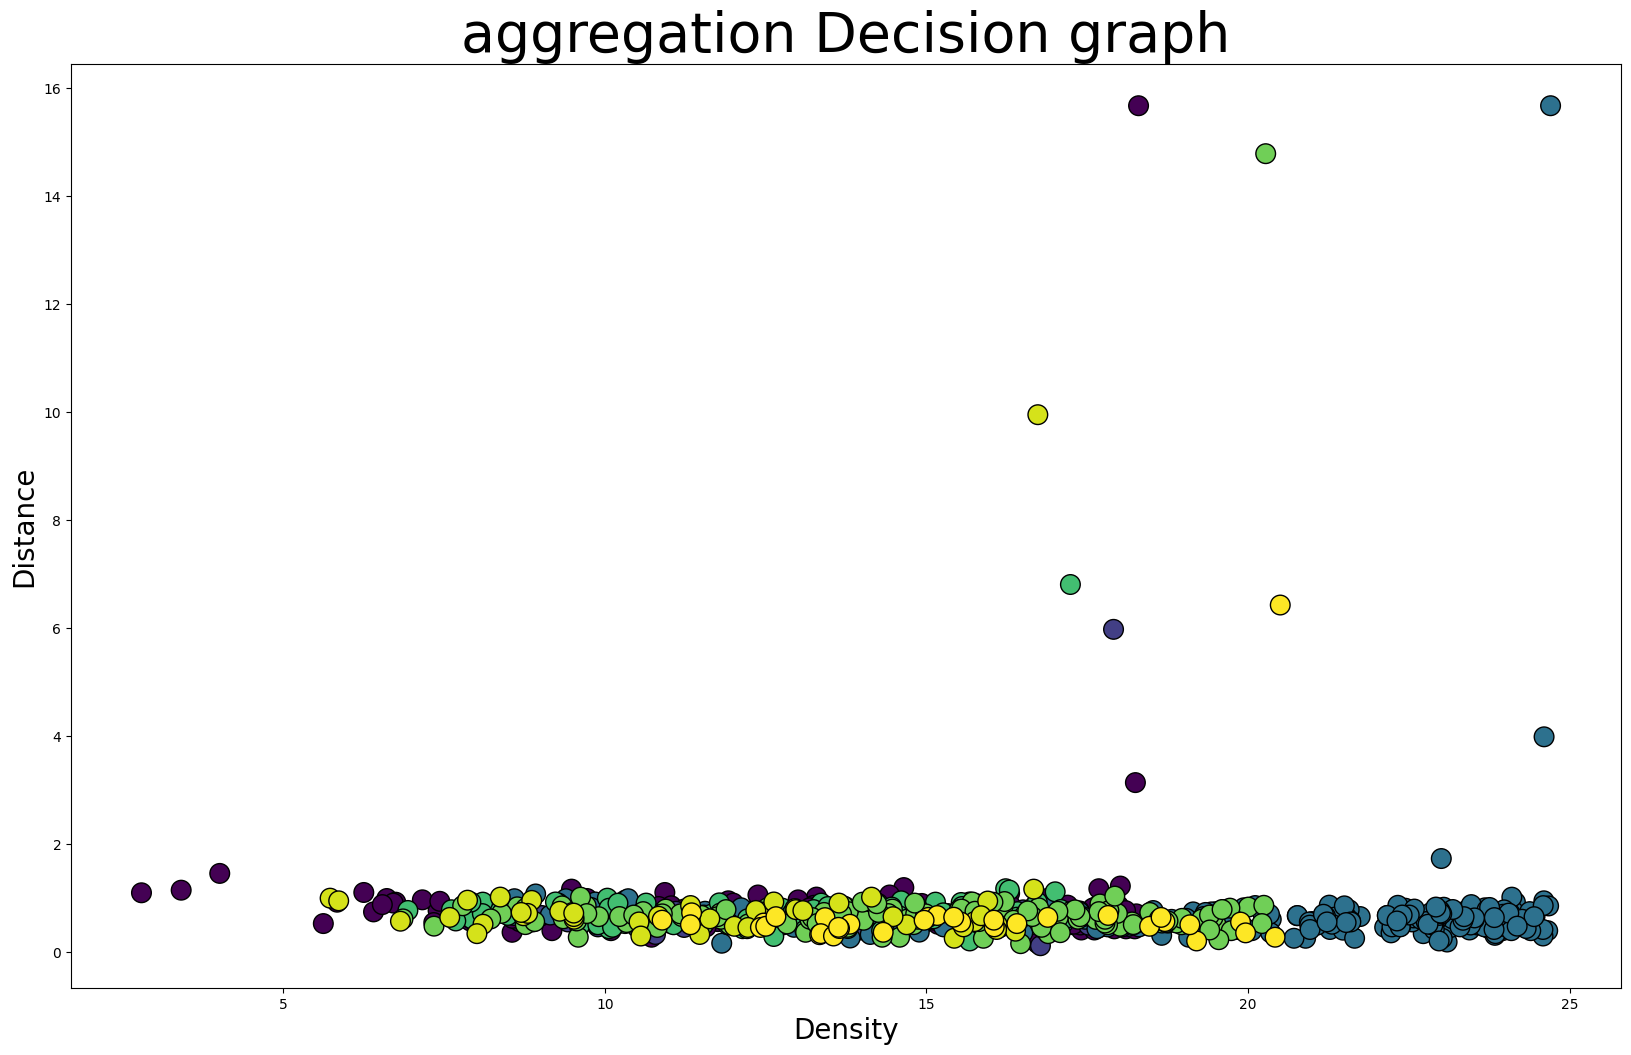

In [565]:
plt.figure(figsize=(20,12))
plt.scatter(
    rho,delta,
    c=labels, marker='o',
    edgecolor='black', s=200
)
plt.xlabel("Density", fontsize=20)
plt.ylabel("Distance", fontsize=20)
plt.title(file + " Decision graph", fontsize=40)
plt.show()

In [566]:
plt.figure(figsize=(20,12))
plt.scatter(
    data_arr[:,0],data_arr[:,1],
    c=labels, marker='o',
    edgecolor='black', s=200
)
plt.xlabel("X", fontsize=20)
plt.ylabel("Y", fontsize=20)
plt.title(file + " DPC", fontsize=40)
plt.show()